### Agents

> Using an LLM to control the logic of application, instead of programming them.

Often a control flow of steps before and / or after an LLM is called a "chain." Chains are a popular paradigm for programming with LLMs and offer a high degree of reliability; the same set of steps runs with each chain invocation.

However, we often want LLM systems that can pick their own control flow! This is one definition of an agent: an agent is a system that **uses an LLM to decide the control flow of an application** - autonomous. Unlike a chain, an agent given an LLM some degree of control over the sequence of steps in the application.

In practice, there is often a trade-off between control and reliability. As we give LLMs more control, the application often become less reliable.

Instead of hard-coding a fixed control flow, we sometimes want LLM systems that can pick its own control flow to solve more complex problems! This is one definition of an agent: an agent is a system that uses an LLM to decide the control flow of an application. There are many ways that an LLM can control application:

 - An LLM can route between two potential paths (if-else, switch)

 - An LLM can decide which of many tools to call (function calling based on natural language)

 - An LLM can decide whether the generated answer is sufficient or more work is needed

### LangGraph

LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and complex, non linear, multi-agent workflows.

At its core, LangGraph models agent workflows as graphs. You define the behavior of your agents using three key components:

 - State: A shared data structure that represents the **current snapshot of your application**. It can be any Python type, but is typically a TypedDict or Pydantic BaseModel.

 - Nodes: Python functions that encode the logic of your agents. They

  - receive the **current `State` as input**,
  
  - perform some computation or side-effect
  
  - and **return an updated State**.

 - Edges: Python functions that determine which Node to execute next based on the current State. They can be conditional branches or fixed transitions.

 In short: nodes do the work. edges tell what to do next.

LangGraph's underlying graph algorithm uses message passing to define a general program. When a Node completes its operation, it sends messages along one or more edges to other node(s). These recipient nodes then execute their functions, pass the resulting messages to the next set of nodes, and the process continues.

### Agent architectures

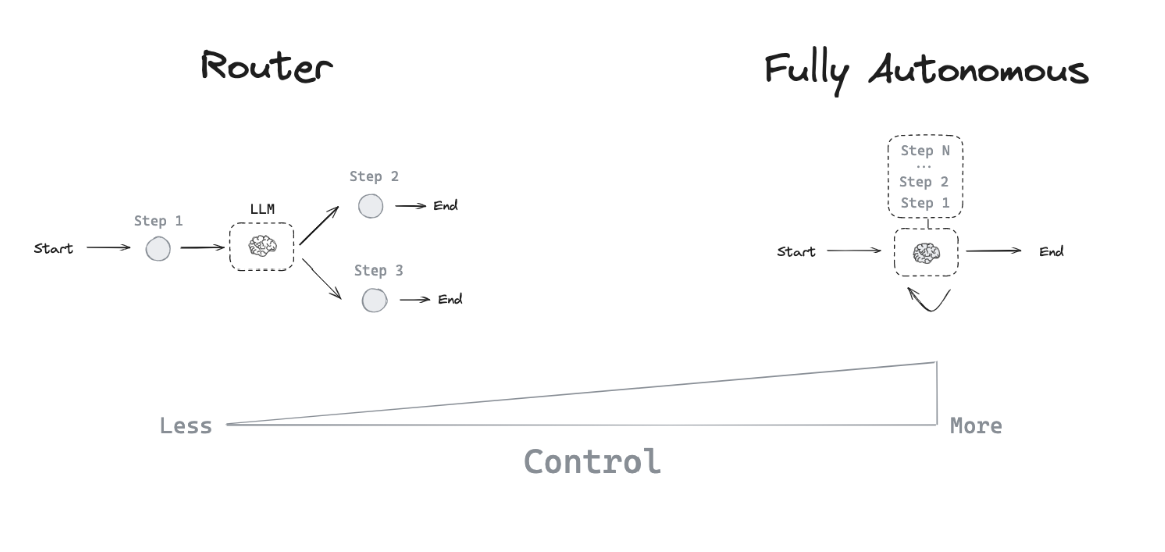

#### Router

A router allows an LLM to select a single step from a specified set of options. This is an agent architecture that exhibits a relatively limited level of control because the LLM usually governs a single decision and can return a narrow set of outputs.

#### Tool calling agent

While a router allows an LLM to make a single decision, more complex agent architectures expand the LLM's control in two key ways:

 - Multi-step decision making: The LLM can control a sequence of decisions rather than just one.

 - Tool access: The LLM can choose from and use a variety of tools to accomplish tasks.

`ReAct` is a popular general purpose agent architecture that combines these expansions, integrating three core concepts.

 - Tool calling: Allowing the LLM to select and use various tools as needed.

 - Memory: Enabling the agent to retain and use information from previous steps.

 - Planning: Empowering the LLM to create and follow multi-step plans to achieve goals.

This architecture allows for more complex and flexible agent behaviors, going beyond simple routing to enable dynamic problem-solving across multiple steps. You can use it with `create_react_agent`.

#### Tool calling

Tools are useful whenever you want an agent to interact with external systems. External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language. When we bind an API, for example, as a tool we given the model awareness of the required input schema. The model will choose to call a tool based upon the natural language input from the user and it will return an output that adheres to the tool's schema.

Tool calling interface in LangChain is simple: you can simply pass any Python function into `ChatModel.bind_tools(function)`.

### Tools

 - [Langchain Tools](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/)

“Tools” in the context of LLMs are utilities designed to be called by a model. They have well-defined schemas that can be input to a model and generate outputs that can be fed back to the model. Tools are needed whenever you want a model to control parts of your code or call out to external APIs, making them an essential building block of LLM applications.

# NVIDIA: Building RAG Agents with LLMs